In [2]:
import pandas as pd
import numpy as np
import os 
import glob

In [3]:
def make_label(filename):
    df = pd.read_excel('../data/Hazumi1911/questionnaire/1911questionnaires.xlsx', sheet_name=4, index_col=0, header=1)
    data = df.loc[filename, :].values.tolist()
    return [(data[0]+(8-data[5]))/2, ((8-data[1])+data[6])/2, (data[2]+(8-data[7]))/2, (data[3]+(8-data[8]))/2, (data[4]+(8-data[9]))/2]

In [4]:
videoIDs = {}
videoAudio = {}
videoText = {}
videoVisual = {} 
videoLabels = {}
videoSentence = {}

Vid = []

path = '../data/Hazumi1911/dumpfiles/*'

files = glob.glob(path)

for file_path in sorted(files):
    filename = os.path.basename(file_path).split('.', 1)[0]
    df = pd.read_csv(file_path)
    text = df.loc[:, 'word#0001':'su'].values.tolist()
    audio = df.loc[:, 'pcm_RMSenergy_sma_max':'F0_sma_de_kurtosis'].values.tolist()
    visual = df.loc[:, '17_acceleration_max':'AU45_c_mean'].values.tolist()
    
    Vid.append(filename)
    videoAudio[filename] = audio 
    videoText[filename] = text 
    videoVisual[filename] = visual 
    videoIDs[filename] = []
    videoLabels[filename] = make_label(filename)
    videoSentence[filename] = []
    print(np.array(text).shape)



(71, 2613)
(113, 2613)
(74, 2613)
(77, 2613)
(98, 2613)
(97, 2613)
(110, 2613)
(90, 2613)
(110, 2613)
(113, 2613)
(81, 2613)
(84, 2613)
(84, 2613)
(97, 2613)
(96, 2613)
(101, 2613)
(98, 2613)
(95, 2613)
(107, 2613)
(104, 2613)
(77, 2613)
(94, 2613)
(54, 2613)
(110, 2613)
(99, 2613)
(105, 2613)


In [5]:
import pickle 

with open('../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='wb') as f:
    pickle.dump((videoIDs, videoLabels, videoText, videoAudio, videoVisual, videoSentence, Vid), f)

In [6]:
for k, v in videoText.items():
    print(k)
    print(np.array(v).shape)
    break

1911F2001
(71, 2613)


In [10]:
np.array(videoVisual['1911F2001']).shape

(71, 66)

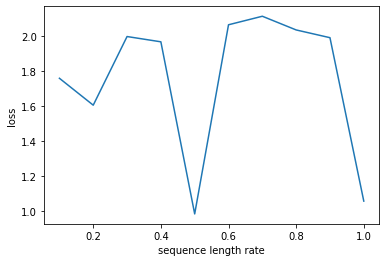

In [8]:
import matplotlib.pyplot as plt 

x = np.arange(0.1, 1.1, 0.1)
y = np.array([1.7584, 1.6046, 1.997, 1.9668, 0.9829, 2.0642, 2.113, 2.0347, 1.9904, 1.0561])
plt.plot(x, y)
plt.xlabel('sequence length rate')
plt.ylabel('loss')
plt.show()

In [9]:
for rate in [np.arange(0.1, 1.1, 0.1)]:
    print(rate)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
videoLabels

{'1911F2001': [4.0, 4.5, 1.5, 5.0, 6.0],
 '1911F2002': [5.5, 5.5, 2.5, 2.5, 4.0],
 '1911F3001': [5.5, 5.5, 3.0, 6.5, 5.5],
 '1911F3002': [5.0, 6.5, 3.5, 4.0, 6.0],
 '1911F3003': [6.0, 4.5, 4.0, 6.0, 6.0],
 '1911F4001': [6.0, 6.5, 4.5, 4.0, 3.0],
 '1911F4002': [6.5, 2.5, 5.0, 4.0, 6.5],
 '1911F4003': [6.0, 5.5, 2.0, 4.0, 3.5],
 '1911F5001': [4.0, 6.0, 4.5, 3.5, 5.0],
 '1911F5002': [6.0, 4.0, 5.5, 4.0, 6.5],
 '1911F6001': [5.5, 6.0, 5.5, 2.5, 5.0],
 '1911F6002': [6.5, 6.5, 6.0, 3.5, 4.5],
 '1911F6003': [6.5, 7.0, 5.5, 3.0, 3.5],
 '1911F7002': [6.0, 6.5, 4.0, 5.5, 4.5],
 '1911M2001': [2.5, 5.5, 3.0, 4.0, 4.5],
 '1911M2002': [5.0, 6.5, 3.0, 5.0, 5.0],
 '1911M2003': [5.0, 6.5, 5.5, 4.5, 4.0],
 '1911M4001': [4.5, 5.5, 2.0, 3.5, 6.0],
 '1911M4002': [6.0, 4.0, 3.0, 4.0, 5.5],
 '1911M5001': [5.5, 6.0, 3.5, 4.0, 5.5],
 '1911M5002': [6.0, 5.5, 5.0, 1.5, 5.0],
 '1911M6001': [6.5, 5.0, 6.5, 2.5, 6.5],
 '1911M6002': [4.5, 5.5, 4.5, 4.0, 5.0],
 '1911M6003': [5.5, 5.0, 4.0, 4.0, 6.0],
 '1911M7001': [3

In [ ]:
a = []
b = []
c = []
d = []
e = []
for key, value in videoLabels.items():
    a.append(value[0])
    b.append(value[1])
    c.append(value[2])
    d.append(value[3])
    e.append(value[4])


(array([2., 2., 2., 0., 3., 5., 0., 4., 5., 3.]),
 array([3.  , 3.35, 3.7 , 4.05, 4.4 , 4.75, 5.1 , 5.45, 5.8 , 6.15, 6.5 ]),
 <BarContainer object of 10 artists>)

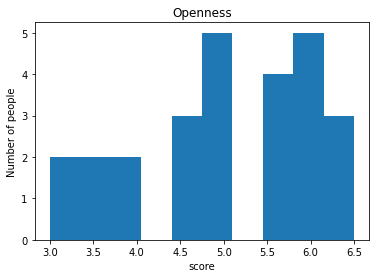

In [22]:
plt.title('Openness')
plt.xlabel('score')
plt.ylabel('Number of people')
plt.hist(e)

In [45]:
pred2 = [1.5638, 0.6013, 0.8606, 0.6285, 1.1076, 1.1209, 2.4503, 1.3882, 0.2933, 0.8943, 0.5149, 1.1386, 1.5669, 0.5513, 0.5815, 0.9508, 0.7877, 1.2218, 0.2034, 0.222, 1.0106, 2.2366, 0.11, 0.2643, 1.6489, 1.0101]
pred1 = [1.6118, 0.8219, 1.4829, 0.3525, 1.0015, 0.8157, 2.3066, 1.4436, 0.4376, 1.1323, 0.3082, 0.4712, 1.751, 0.5494, 1.0386, 0.5242, 0.5565, 0.7284, 0.7132, 0.2525, 1.1329, 0.9495, 0.128, 0.2092, 1.282, 0.9575]

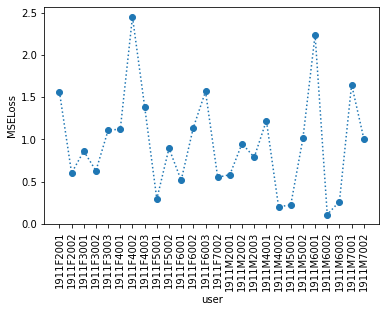

In [46]:
plt.plot(Vid, pred2, 'o', linestyle='dotted')
plt.xticks(rotation=90)
plt.xlabel('user')
plt.ylabel('MSELoss')
plt.show()

In [38]:
y = [4.461722 , 4.5973744 ,3.6602669 ,3.7350514 ,5.1462593]
t = [6.5 ,2.5 ,5. , 4. , 6.5]
sum = 0
for i in range(len(y)):
    sum += (y[i] - t[i]) * (y[i] - t[i])
sum / len(y)

2.4502506003546842

In [40]:
y = [5.0385575 ,5.2490487 ,4.1965404, 3.713891 , 4.8480945]
t = [4.5 ,5.5 ,4.5 ,4.  ,5. ]
sum = 0
for i in range(len(y)):
    sum += (y[i] - t[i]) * (y[i] - t[i])
sum / len(y)

0.11000842108426986

In [43]:
import statistics 

median = statistics.median_high(pred)
median

0.8219